In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')

from astropy.io import fits

# FEROS and APF Spectra

In [2]:
# APF wavelengths
apf_wl = fits.open('apf_wave_2022.fits')
apf_wavl = apf_wl[0].data
apf_wl.close()

In [3]:
def read_spectrum(filename, order = None, apf = False):
    """General function to read in FEROS or APF spectra. Expects filename, desired spectral order, and 
    boolean indicating whether spectrum is from APF. Returns wavelength and flux (not continuum-normalized)."""
    hdul = fits.open(filename)
    if order is None:
        if apf:
            order = 34
        else:
            order = 10
    data = hdul[0].data
    hdul.close()
    if apf:
        wavl = apf_wavl[order]
        flux = data[order, :]
        return wavl, flux
    else:
        wavl = data[0][order]
        flux = data[1][order]
        return wavl, flux

In [4]:
# Example of a FEROS spectrum
feros_wavl, feros_flux = read_spectrum('../low_feh_spec/lowfeh_1183864824124929792_20240624_UT03:15:58.441_sp.fits')

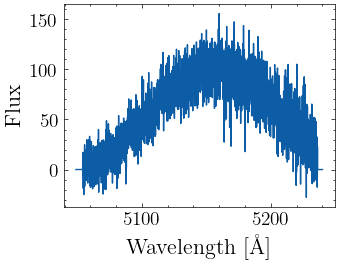

In [5]:
_ = plt.figure()
plt.xlabel('Wavelength [\AA]', size = 16)
plt.ylabel('Flux', size = 16)
plt.tick_params(labelsize = 14, which = 'both')
plt.plot(feros_wavl, feros_flux);

In [6]:
# Example of an APF spectrum
apf_exwavl, apf_exflux = read_spectrum('../low_feh_spec/GAIADR3_1028448477581901184.fits', apf = True)

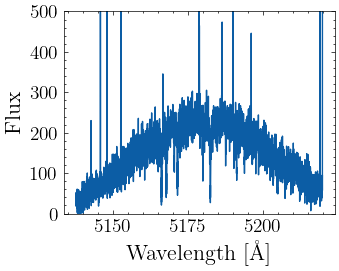

In [7]:
_ = plt.figure()
plt.xlabel('Wavelength [\AA]', size = 16)
plt.ylabel('Flux', size = 16)
plt.tick_params(labelsize = 14, which = 'both')
plt.plot(apf_exwavl, apf_exflux)
plt.ylim(0, 500);

# MIKE Follow-up Spectrum

In [8]:
from readmultispec import readmultispec

blue_retdict = readmultispec('UTF-86769blue_multi.fits')
blue_wavl = blue_retdict['wavelen']
blue_flux = blue_retdict['flux'][-1]
blue_fluxerr = blue_retdict['flux'][2]

red_retdict = readmultispec('UTF-86769red_multi.fits')
red_wavl = red_retdict['wavelen']
red_flux = red_retdict['flux'][-1]
red_fluxerr = red_retdict['flux'][2]

Dispersion is linear
Correcting for redshift: z=0.000000
Dispersion is linear
Correcting for redshift: z=0.000000


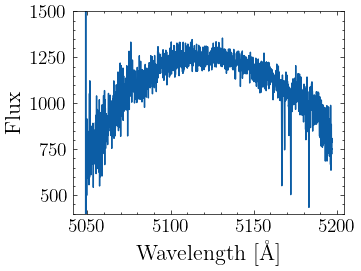

In [9]:
# Example spectral order from MIKE spectrum

_ = plt.figure()
plt.xlabel('Wavelength [\AA]', size = 16)
plt.ylabel('Flux', size = 16)
plt.tick_params(labelsize = 14, which = 'both')
plt.plot(red_wavl[30], red_flux[30])
plt.ylim(400, 1500);